In [41]:
import numpy as np
import pandas as pd

%matplotlib inline

from scipy import stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [30]:
ar = np.loadtxt('work/hse/applied_stats/week1/failure_time.txt')

In [31]:
ar = np.diff(ar)

In [32]:
ar.mean()

656.8814814814815

In [33]:
from statsmodels.stats.weightstats import _tconfint_generic
n = len(ar)
print("95% confidence interval:", _tconfint_generic(
    ar.mean(), 
    ar.std(ddof=1) / np.sqrt(n),
    dof = n-1,
    alpha=0.05,
    alternative = 'two-sided'))

95% confidence interval: (480.30808862423476, 833.4548743387282)


use get_bootstrap_samples and percentile_interval functions from the example notebook

set random seed = 0 before calling get_bootstrap_samples, once

use 10000 bootstrap resamples

In [34]:
def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples

In [35]:
def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [38]:
np.random.seed(0)

samples = get_bootstrap_samples(ar, 10000)
print(samples.shape)
ar_mean_scores = list(map(np.mean, samples))
print("95% confidence interval for the ILEC median repair time:",  percentile_interval(ar_mean_scores, 0.05))

(10000, 135)
95% confidence interval for the ILEC median repair time: [492.31703704 838.1562963 ]


AttributeError: 'Rectangle' object has no property 'bin'

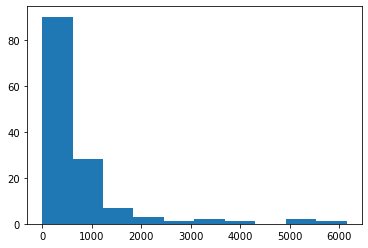

In [50]:
df = pd.DataFrame({
    'ft': ar
})
df.plot.hist(bin=20)